# Predicting Future Sales - A Machine Learning Project by Guillermo Rios Martinez

**Introduction:**
<br>
**Goal:**
<br>
The goal of this project is to predict the total sales for every product and store in the next month. 

## Setting up Python Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np

# Import Visualization libraries
import seaborn as sns

# Import Machine Learning libraries

## Importing the Data

In [2]:
# Import the data to a dataframe
sales = pd.read_csv('sales_train.csv')

# Prints the first five rows of the sales dataframe
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


## Understanding the Data

We are given data that ranges from January 2013 up to October 2015 (`date`). The feature, `date_block_num`, is a consecutive month number starting with 0 being January 2013 and 33 being October 2015. Additionaly, we are given the unique identifier of a shop (`shop_id`) as well as a unique identifier for an item (`item_id`) and the current price (`item_price`). For each item, we are given the number of products sold (`item_cnt_day`). 

In [3]:
# The total number of data points
sales.shape

(2935849, 6)

## Data Exploration & Cleaning

We are going to explore each feature and determine if there is a need to manipulate the data to get better results in the end. 

### date_block_num

In [4]:
# Get mean, standard deviation, min, and max
print("Mean: " + str(sales['date_block_num'].mean()))
print("Standard Deviation: " + str(sales['date_block_num'].std()))
print("Min: " + str(sales['date_block_num'].min()))
print("Max: " + str(sales['date_block_num'].max()))

Mean: 14.56991146343017
Standard Deviation: 9.42298770875573
Min: 0
Max: 33


<AxesSubplot:xlabel='date_block_num', ylabel='Count'>

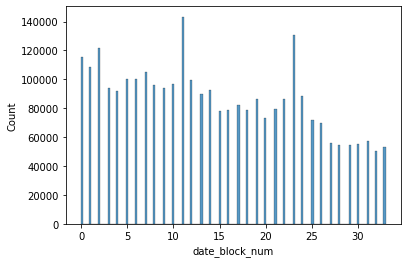

In [5]:
# Histogram of date_block_num to check the distribution of values
sns.histplot(data=sales, x="date_block_num")

### shop_id

In [6]:
# Get mean, standard deviation, min, and max
print("Mean: " + str(sales['shop_id'].mean()))
print("Standard Deviation: " + str(sales['shop_id'].std()))
print("Min: " + str(sales['shop_id'].min()))
print("Max: " + str(sales['shop_id'].max()))

Mean: 33.001728290521754
Standard Deviation: 16.226973048333605
Min: 0
Max: 59


<AxesSubplot:xlabel='shop_id', ylabel='Count'>

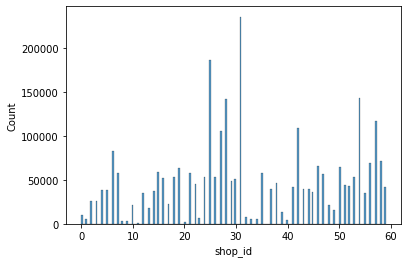

In [7]:
# Histogram of shop_id to check the distribution of values
sns.histplot(data=sales, x="shop_id")

We can see form the information, there are 60 unique shops in the data. 

### item_id

In [8]:
# Get mean, standard deviation, min, and max
print("Mean: " + str(sales['item_id'].mean()))
print("Standard Deviation: " + str(sales['item_id'].std()))
print("Min: " + str(sales['item_id'].min()))
print("Max: " + str(sales['item_id'].max()))

Mean: 10197.227056977385
Standard Deviation: 6324.297353891169
Min: 0
Max: 22169


<AxesSubplot:xlabel='item_id', ylabel='Count'>

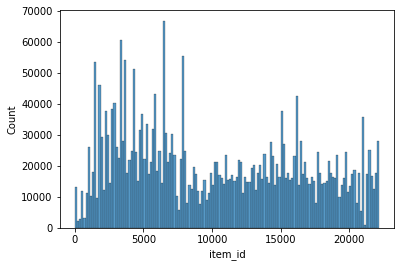

In [9]:
# Histogram of item_id to check the distribution of values
sns.histplot(data=sales, x="item_id")

We can see that there are 22,169 unique items in the data.

### item_price

In [10]:
# Get mean, standard deviation, min, and max
print("Mean: " + str(sales['item_price'].mean()))
print("Standard Deviation: " + str(sales['item_price'].std()))
print("Min: " + str(sales['item_price'].min()))
print("Max: " + str(sales['item_price'].max()))

Mean: 890.8532326980126
Standard Deviation: 1729.7996307126623
Min: -1.0
Max: 307980.0


We will use a boxplot instead of a histogram becuase there seems to be a huge difference in our max and min.

<AxesSubplot:xlabel='item_price'>

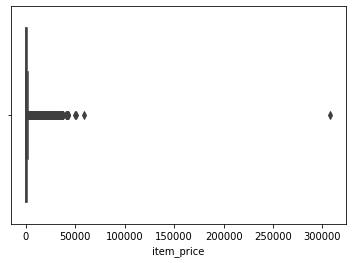

In [11]:
# Boxplot of item_price to check the distribution of values
sns.boxplot(x=sales['item_price'])

**We see here there are a couple discrepancies in the data. We will now find solutions to these problems before moving on.**
<br>
**1. There is a min value of -1 in the data. It is not possible for an item to be priced as -1.**

In [12]:
# Check how many data points have a value of -1 in item_price
print("item_price has, " + str(sales[sales['item_price'] == -1].shape[0]) + " point(s) with -1 as a value!")

item_price has, 1 point(s) with -1 as a value!


In [13]:
# The data point
print(sales[sales['item_price'] == -1])

              date  date_block_num  shop_id  item_id  item_price  item_cnt_day
484683  15.05.2013               4       32     2973        -1.0           1.0


Since there is only 1 data point, we can go ahead and drop this point without having to worry about significant effects in our end results since there are so many data points. 

In [14]:
# Dropping the data point
sales.drop(sales[sales['item_price'] == -1].index, inplace=True)

**2. There is a max value of 307,980. This seems too high compared to the other prices.**

From the boxplot above, we can see that 50,000 is a good cutting off point to get rid of outliers. 

In [15]:
# Check how many data points have a value of greater than 50,000 in item_price
print("item_price has, " + str(sales[sales['item_price'] > 50000].shape[0]) + " point(s) greater than 50,000 as a value!")

item_price has, 3 point(s) greater than 50,000 as a value!


In [16]:
# The data points
print(sales[sales['item_price'] > 50000])

               date  date_block_num  shop_id  item_id  item_price  \
885138   17.09.2013               8       12    11365     59200.0   
1163158  13.12.2013              11       12     6066    307980.0   
1488135  20.03.2014              14       25    13199     50999.0   

         item_cnt_day  
885138            1.0  
1163158           1.0  
1488135           1.0  


In [17]:
# Dropping the data points
sales.drop(sales[sales['item_price'] > 50000].index, inplace=True)

<AxesSubplot:xlabel='item_price'>

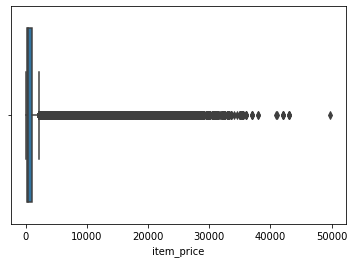

In [18]:
# Boxplot of item_price to check the distribution of values
sns.boxplot(x=sales['item_price'])

**And now, our new information about item_price:**

In [19]:
# Get mean, standard deviation, min, and max
print("Mean: " + str(sales['item_price'].mean()))
print("Standard Deviation: " + str(sales['item_price'].std()))
print("Min: " + str(sales['item_price'].min()))
print("Max: " + str(sales['item_price'].max()))

Mean: 890.7120077399277
Standard Deviation: 1719.905730363257
Min: 0.07
Max: 49782.0


### item_cnt_day

In [20]:
# Get mean, standard deviation, min, and max
print("Mean: " + str(sales['item_cnt_day'].mean()))
print("Standard Deviation: " + str(sales['item_cnt_day'].std()))
print("Min: " + str(sales['item_cnt_day'].min()))
print("Max: " + str(sales['item_cnt_day'].max()))

Mean: 1.242641215731757
Standard Deviation: 2.618836199621761
Min: -22.0
Max: 2169.0


Similar to item_price, we see a huge difference in the max and min, so we will use a Boxplot.

<AxesSubplot:xlabel='item_cnt_day'>

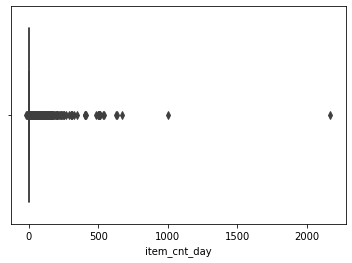

In [21]:
# Boxplot of item_cnt_day to check the distribution of values
sns.boxplot(x=sales['item_cnt_day'])

Unlike item_price, negative values here make sense since it is possible to have returns of a product, thus resulting in a negative value. We can however, see a couple outliers. To remedy this, we will drop any values greater than 750. 

**1. Getting rid of outliers in item_cnt_day**

In [22]:
# Check how many data points have a value greater than 750 in item_cnt_day
print("item_cnt_day has, " + str(sales[sales['item_cnt_day'] > 750].shape[0]) + " point(s) greater than 750 as a value!")

item_cnt_day has, 2 point(s) greater than 750 as a value!


In [23]:
# Dropping the data points
sales.drop(sales[sales['item_cnt_day'] > 750].index, inplace=True)

<AxesSubplot:xlabel='item_cnt_day'>

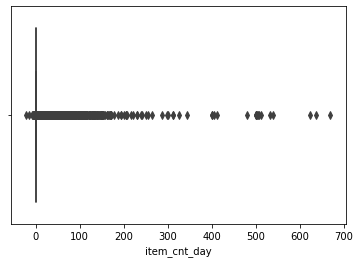

In [24]:
# Boxplot of item_cnt_day to check the distribution of values
sns.boxplot(x=sales['item_cnt_day'])

**And now, our new information about item_cnt_day:**

In [25]:
# Get mean, standard deviation, min, and max
print("Mean: " + str(sales['item_cnt_day'].mean()))
print("Standard Deviation: " + str(sales['item_cnt_day'].std()))
print("Min: " + str(sales['item_cnt_day'].min()))
print("Max: " + str(sales['item_cnt_day'].max()))

Mean: 1.2415626448689525
Standard Deviation: 2.217636855179188
Min: -22.0
Max: 669.0


Now that our features have been rid of outliers and some negative values, we will now take a further look at the data as a whole. We'll take a look at repeated data points to finish.

### Duplicates in the data:

In [26]:
# Get the data points that are duplicated
print(sales[sales.duplicated()])

               date  date_block_num  shop_id  item_id  item_price  \
76962    05.01.2013               0       54    20130       149.0   
1435367  23.02.2014              13       50     3423       999.0   
1496766  23.03.2014              14       21     3423       999.0   
1671873  01.05.2014              16       50     3423       999.0   
1866340  12.07.2014              18       25     3423       999.0   
2198566  31.12.2014              23       42    21619       499.0   

         item_cnt_day  
76962             1.0  
1435367           1.0  
1496766           1.0  
1671873           1.0  
1866340           1.0  
2198566           1.0  


There are only 6 points in the data that are duplicated, so this probably won't affect our end results very much. I have decided to drop these points. 

In [27]:
# Dropping duplicate data points
sales.drop(sales[sales.duplicated()].index, inplace=True)

## Feature Engineering

At the moment, our data is representing the amount of items sold per day. We want to predict the total sales for the month. To be able to accomplish this, we will have to reformat the data to better fit our needs by converting the data in to monthly reports instead of daily.

In [28]:
# Getting rid of date feature. We will not be using this feature since we want the monthly count, not daily.
# We already have date_block_num to get the month and year. (0 is January 2013)
sales = sales.drop('date', axis=1)

In [29]:
# A view of our updated data set
sales.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,0,59,22154,999.00,1.0
1,0,25,2552,899.00,1.0
2,0,25,2552,899.00,-1.0
3,0,25,2554,1709.05,1.0
4,0,25,2555,1099.00,1.0


In [30]:
# Change the item count to monthly instead of daily.
# Group by date_block_num, shop_id, item_id, and item_price
# Then get the average price of the item and sum the item counts
sales_monthly = sales.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'item_price':'mean', 'item_cnt_day':'sum'}).reset_index()

# Rename item_cnt_day to item_cnt_month
sales_monthly = sales_monthly.rename(columns={"item_cnt_day":"item_cnt_month"})

In [31]:
# A view of the new monthly sales data set
sales_monthly.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_month
0,0,0,32,221.0,6.0
1,0,0,33,347.0,3.0
2,0,0,35,247.0,1.0
3,0,0,43,221.0,1.0
4,0,0,51,128.5,2.0


In [32]:
# The size of our new data set should be smaller since we've grouped 
print("The size of the montly data set is " + str(sales_monthly.shape[0]))
print("Compared to our daily data set which is " + str(sales.shape[0]))

The size of the montly data set is 1609121
Compared to our daily data set which is 2935837


**Let's take a qick look and see the changes made by performing the groupby function by looking at a specific store and item on a specific month and compare the results:**
<br>
<br>
**The results of shop #59 and item id 17717 on October 2015 on the original data set are:**

In [33]:
# Take a look at a specific month, shop, item, and see if there are duplicates in the ORIGINAL data set.
original = sales[(sales["date_block_num"] == 33) & (sales["shop_id"] == 59) & (sales["item_id"] == 17717)]

print(original)

         date_block_num  shop_id  item_id  item_price  item_cnt_day
2899227              33       59    17717      1250.0           2.0
2899228              33       59    17717      1999.0           1.0
2899229              33       59    17717       500.0           1.0
2899230              33       59    17717      1250.0           2.0
2899231              33       59    17717       809.5           2.0
2899232              33       59    17717       299.0           1.0
2899233              33       59    17717       500.0           1.0
2899234              33       59    17717       499.0           1.0
2899235              33       59    17717       500.0           1.0
2899236              33       59    17717       419.0           1.0


**The results of shop #59 and item id 17717 on October 2015 on the updated data set are:**

In [34]:
# Take a look at the same data point from above and see if how the groupby function changed the results.
updated = sales_monthly[(sales_monthly["date_block_num"] == 33) & (sales_monthly["shop_id"] == 59) & (sales_monthly["item_id"] == 17717)]

print(updated)

         date_block_num  shop_id  item_id  item_price  item_cnt_month
1609057              33       59    17717      802.55            13.0


**Then we will confirm there are no duplicate data points in our data set:**

In [35]:
# Checks the number of duplicate points in the data set sales_monthly
print("There are " + str(len(sales_monthly[sales_monthly.duplicated(subset=['item_id', 'shop_id', 'date_block_num'])])) + " duplicate data points!")

There are 0 duplicate data points!


## Our Clean Data Set: Monthly Sales - Exploration and Visualizations

Now that we have a clean data set, we can take a look at what exactly the data is telling us and get an idea of what predictive models we could use for the next section. 

In [36]:
# Function to easily get a data frame of a certain shop and item 
def get_shop_item_df(shop_id, item_id):
    shop_item_df = sales_monthly[(sales_monthly['shop_id'] == shop_id) & (sales_monthly['item_id'] == item_id)]
    return shop_item_df

# Our example shop 59 and item 17717
print(get_shop_item_df(59, 17717))

         date_block_num  shop_id  item_id   item_price  item_cnt_month
122999                1       59    17717   565.666667             3.0
621301               10       59    17717   227.000000             5.0
974918               17       59    17717   669.500000             2.0
1020688              18       59    17717   963.200000             5.0
1067099              19       59    17717   812.983333            20.0
1107555              20       59    17717   838.763605            27.0
1150147              21       59    17717   703.131944            21.0
1195885              22       59    17717   913.564815            46.0
1255136              23       59    17717   986.053333            34.0
1301927              24       59    17717   815.693750            27.0
1343354              25       59    17717  1139.736111            22.0
1383799              26       59    17717  1074.416667            26.0
1416682              27       59    17717  1262.153846            19.0
144892

Text(0, 0.5, '# of Units Sold')

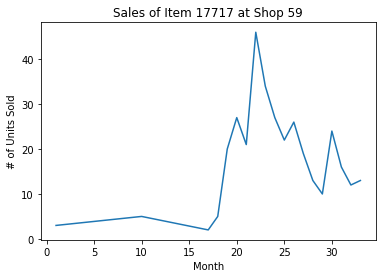

In [37]:
plt = sns.lineplot(data=get_shop_item_df(59, 17717), x="date_block_num", y="item_cnt_month")
plt.set_title('Sales of Item 17717 at Shop 59')
plt.set_xlabel('Month')
plt.set_ylabel('# of Units Sold')

Text(0, 0.5, 'Price of Item 17717')

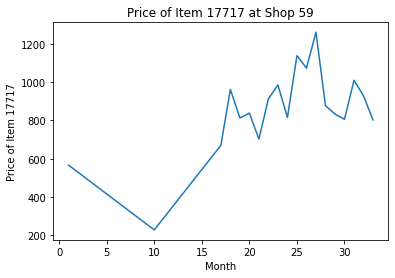

In [38]:
plt = sns.lineplot(data=get_shop_item_df(59, 17717), x="date_block_num", y="item_price")
plt.set_title('Price of Item 17717 at Shop 59')
plt.set_xlabel('Month')
plt.set_ylabel('Price of Item 17717')